In [ ]:
%load_ext autoreload
%autoreload 2

import sys, os, logging
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

from caiman.utils.utils import load_dict_from_hdf5

root_dir = Path.cwd()
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))


from HierarchicalBayesInference_analysis import HierarchicalBayesInference_analysis
from utils import prepare_behavior_from_file, prepare_activity

2024-12-19 21:49:51.459502: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-19 21:49:51.482592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
## general analysis parameters
nbin = 40
hierarchical = ['theta']
wrap = []

## data parameters
f = 15.
pathSession = '../../../data/579ad/Session10'
neuron = 1

In [30]:
pathBehavior = os.path.join(pathSession,'aligned_behavior.pkl')
bin_array = np.linspace(0,nbin-1,nbin)
behavior = prepare_behavior_from_file(pathBehavior,nbin=nbin,f=15.)

pathActivity = [os.path.join(pathSession,file) for file in os.listdir(pathSession) if (file.startswith('results_CaImAn') and 'redetected' in file and not ('compare' in file))][0]
ld = load_dict_from_hdf5(pathActivity)
S = ld['S'][neuron,:]
activity = prepare_activity(S,behavior['active'],behavior['trials'],nbin=nbin)

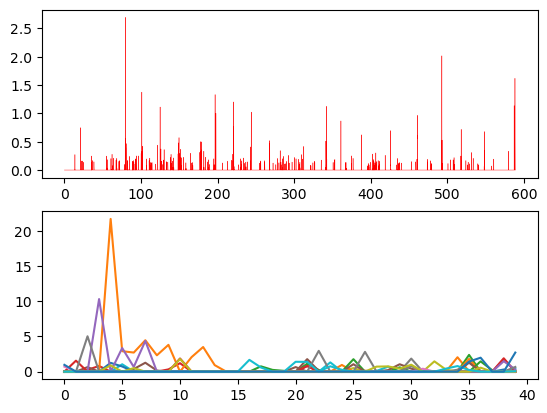

In [31]:
fig = plt.figure()
ax = fig.add_subplot(211)   
ax.plot(behavior['time_raw'],activity['S'],'r',linewidth=0.3)

ax = fig.add_subplot(212)
ax.plot(activity['trial_map'].T)
plt.show(block=False)

In [75]:
hierarchical=['theta']
wrap=[]

hbm = HierarchicalBayesInference_analysis(
	activity['spike_map'],
	behavior['trials']['dwelltime'],
	nbin,
	logLevel=logging.ERROR,
)
results = hbm.model_comparison(hierarchical=['theta'])

In [76]:
hbm.inference_results['fields']

{'parameter': {'global': {'A0': array([0.08981164, 0.06497747, 0.11866278]),
   'theta': array([[4.67602139, 3.04789175, 6.35102284],
          [0.        , 0.        , 0.        ]]),
   'A': array([[0.58211286, 0.18094248, 0.87238926],
          [0.        , 0.        , 0.        ]]),
   'sigma': array([[1.76447969, 0.85937712, 2.71292122],
          [0.        , 0.        , 0.        ]])},
  'local': {'A0': None,
   'theta': array([[[4.79738473, 2.50562336, 7.11069049],
           [4.47576362, 1.90199776, 6.12434051],
           [4.5799922 , 2.6818946 , 6.17651197],
           [4.52207122, 2.81415835, 6.369359  ],
           [4.73100472, 2.6379858 , 6.71088703],
           [4.6334585 , 2.56136151, 6.55913156],
           [4.40090534, 2.79542038, 6.20494632],
           [4.6655792 , 3.00308272, 6.44544947],
           [4.52173553, 2.35853146, 6.31922588],
           [4.72000977, 3.28759846, 6.25013709],
           [4.59257359, 2.53898029, 6.40713414],
           [4.69721576, 3.3806639

In [34]:
results

{'parameter': {'global': {'A0': array([0.08249403, 0.05368857, 0.11072742]),
   'theta': array([[5.26956675, 3.44071979, 7.54849228]]),
   'A': array([[0.49664304, 0.18960476, 0.79301802]]),
   'sigma': array([[2.46014484, 1.56824357, 3.70126437]])},
  'local': {'A0': None,
   'theta': array([[[ 5.66106839,  2.79011699,  9.87666862],
           [ 5.21424438,  2.76969639,  8.2562048 ],
           [ 5.62599869,  3.19795378,  9.35753885],
           [ 5.45550448,  3.24962401,  9.07341267],
           [ 4.80061207,  2.66776173,  7.27851618],
           [ 5.27281175,  2.65123072,  8.33228813],
           [ 4.55479819,  1.91085602,  6.7264303 ],
           [ 5.53312036,  3.35149388,  8.19261592],
           [ 5.48737548,  3.21888869,  9.09289607],
           [ 5.92051106,  3.45083556, 10.00055026],
           [ 5.58709832,  3.14644113,  8.81609848],
           [ 4.90384542,  3.08370985,  7.05967373],
           [ 4.75933388,  2.13223949,  7.41078278],
           [ 5.94660462,  3.47663694, 10

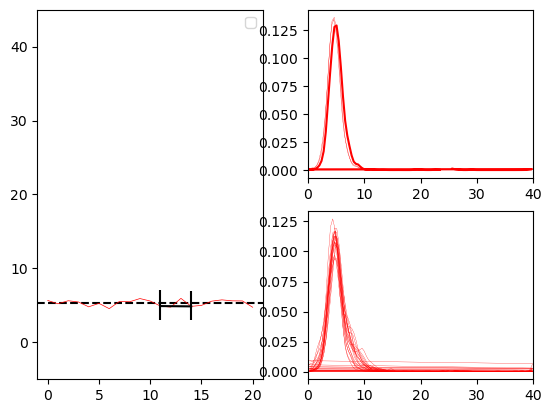

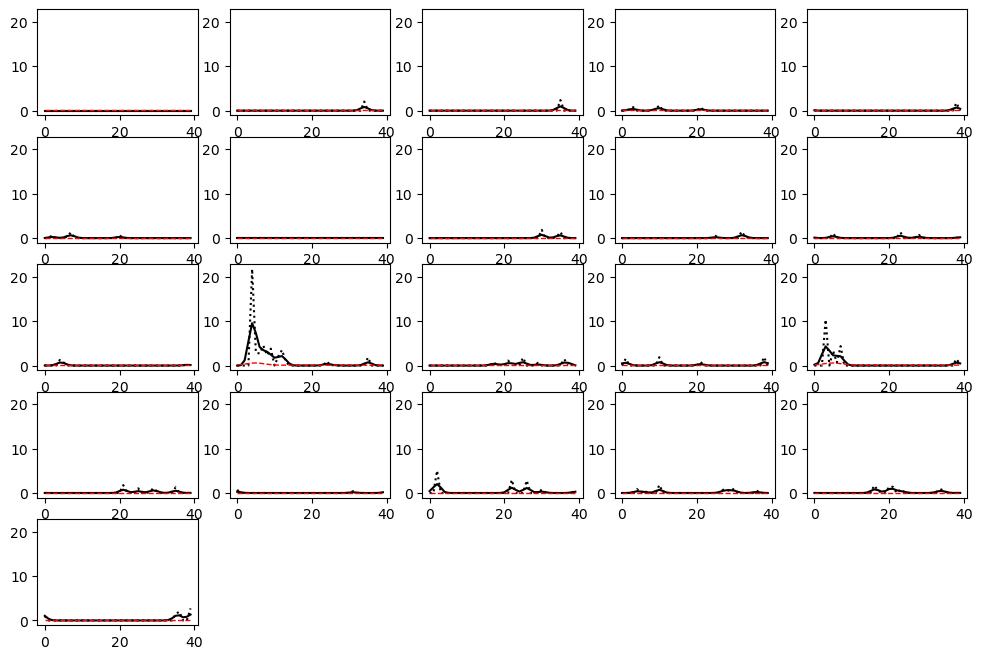

In [33]:
hbm.display_results()

In [72]:

results = hbm.run_sampling()
hbm.build_posterior(results)

IndexError: arrays used as indices must be of integer (or boolean) type

# Here comes the testing of the general process method

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np


In [2]:
import sys
root_dir = Path.cwd().parents[1]
sys.path.insert(0,str(root_dir))
# print(str(Path(__file__).resolve().parent))
print(root_dir)

from placefield_dynamics import placefield_detection# import process_session
# from . import process_session
# from process_session import process_session

/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis
/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection


2024-12-31 00:42:58.508592: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-31 00:42:58.531139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
s=2
ps = placefield_detection.process_session(plot_it=False)

pathSession = Path.cwd().parents[2] / f'data/555wt/Session{s:02d}'
for path in pathSession.iterdir():
	if path.stem.startswith('results_CaImAn') and path.stem.endswith('redetected'):
		path_data = path
		break

results = ps.process_input_from_file(
    path_data = path_data,
    path_behavior = pathSession / 'aligned_behavior.pkl',
    path_results = pathSession / 'placefield_detection.hdf5',
    mode_place_cell_detection=['peak','information'],
    mode_place_field_detection=['bayesian'],
    # specific_n=np.arange(700,726),
    nP=12,
)

run detection on 756 neurons
Not enough instances of activity detected
Not enough instances of activity detectedNot enough instances of activity detected

Not enough instances of activity detected
Not enough instances of activity detected
Model comparison finished after 37.07s with evidences: 	 f=0 *, logz=-65.78	 f=1 , logz=-66.90
Model comparison finished after 38.15s with evidences: 	 f=0 *, logz=-138.23	 f=1 , logz=-139.41
Model comparison finished after 40.06s with evidences: 	 f=0 *, logz=-85.44	 f=1 , logz=-87.11
Model comparison finished after 45.45s with evidences: 	 f=0 *, logz=-223.58	 f=1 , logz=-225.33
Not enough instances of activity detected
Model comparison finished after 56.54s with evidences: 	 f=0 *, logz=-41.28	 f=1 , logz=-42.04
Model comparison finished after 57.98s with evidences: 	 f=0 *, logz=-144.88	 f=1 , logz=-145.08
Model comparison finished after 59.62s with evidences: 	 f=0 *, logz=-69.35	 f=1 , logz=-70.56
Model comparison finished after 42.24s with evid

KeyboardInterrupt: 

In [15]:
from placefield_detection.utils import load_data
from placefield_detection.utils import prepare_behavior_from_file, prepare_activity

nbin = 40
# mouse = '555wt'
# s = 29
# neuron = 666
mouse = '650ad'
s = 1
neuron = 0


pathSession = Path.cwd().parents[2] / f'data/{mouse}/Session{s:02d}'
for path in pathSession.iterdir():
	if path.stem.startswith('results_CaImAn') and path.stem.endswith('redetected'):
		ld = load_data(path)
		break
behavior = prepare_behavior_from_file(pathSession / 'aligned_behavior.pkl',nbin=nbin,f=15.)
processed_activity = prepare_activity(ld['S'][neuron,:],behavior['active'],behavior['trials'],nbin=nbin)

# path = pathSession / 'results_CaImAn_thy1g7#555_hp_16x1.5x_145um_96v94v_62p_res_lave2_am_redetected.hdf5'
# ld = load_data(path)


In [8]:
(behavior['binpos']<0).sum()

1

In [13]:
import logging
from matplotlib import pyplot as plt
from placefield_dynamics.placefield_detection.HierarchicalBayesInference import HierarchicalBayesInference

hbm = HierarchicalBayesInference(
	processed_activity["spike_map"],
	behavior["trials"]["dwelltime"],
	nbin=nbin,
	logLevel=logging.ERROR,
)
# hbm.set_priors(N_f=0,hierarchical_in=['theta'])
# # hbm.priors
# my_prior_transform = hbm.set_prior_transform(vectorized=True)
# my_logl = hbm.set_logp_func(vectorized=True)

# sampling_results = hbm.run_sampling(
# 	penalties=["overlap", "reliability"], improvement_loops=2
# )

"""
	fix via...
		- thresholding / clipping ?
        - checking logl again for further avoiding infs (using log, ...)
        - checking if sums etc are properly avoiding nans, ...
"""
hbm.model_comparison(hierarchical=['theta'],show_status=True,limit_execution_time=30)


f=0

Forever is over!%) | Like=-28088.90..-28088.83 [-inf..-2.809e+04] | it/evals=1100/91468 eff=1.4132% N=200  N=100 
Exception: Sampling took too long
Model comparison finished after 10.00s with evidences: 


{'status': {'is_place_cell': {'peak_method': array(False),
   'information_method': array(False),
   'stability_method': array(False),
   'bayesian_method': False},
  'SNR': array(nan),
  'r_value': array(nan)},
 'fields': {'parameter': {'global': {'A0': array([0., 0., 0.]),
    'theta': array([[0., 0., 0.],
           [0., 0., 0.]]),
    'A': array([[0., 0., 0.],
           [0., 0., 0.]]),
    'sigma': array([[0., 0., 0.],
           [0., 0., 0.]])},
   'local': {'A0': None,
    'theta': array([[[0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.],
            [0., 0., 0.]],
    
           [[0., 0., 0.],
            [0., 0., 0.],
          

In [18]:
import signal
import time

class TimeoutException(Exception):
    def __init__(self, *args, **kwargs):
        pass

def handler(signum, frame):
	print("Forever is over!")
	raise TimeoutException("end of time")

def loop_forever():
	
	i=0
	while i<5:
		
		print("sec")
		time.sleep(1)
		i += 1

signal.signal(signal.SIGALRM, handler)

try:
	signal.alarm(6)
	loop_forever()
	signal.alarm(0)
	# do something
	# print('ok')
except Exception as exc:
	print('timeout',exc)
	print(type(exc))


sec
sec
sec
sec
sec


Forever is over!


: 

783


array([[[118.34166918, 420.88100853],
        [  5.33144151,  32.40648829]]])

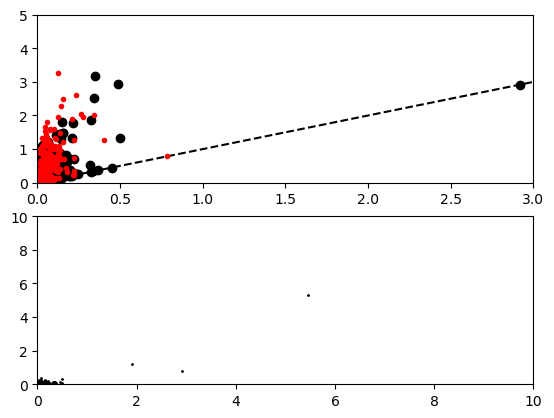

In [41]:
S = ld['S'][:,behavior['active']]
n_cells = S.shape[0]
print(n_cells)
perc = np.full((n_cells,2),np.nan)
perc_fmap = np.full((n_cells,2),np.nan)
for n in range(n_cells):
	S_n = S[n,S[n,:]>0]
	if len(S_n) > 0:
		perc[n,:] = np.percentile(S[n,S[n,:]>0],[10,90])

	fmap = results['firingstats']['map'][n,:]
	if np.any(fmap>0):
		perc_fmap[n,:] = np.percentile(fmap[fmap>0],[10,90])

from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(211)
ax.axline([0,0],[1,1],color='k',linestyle='--')
ax.plot(perc[:,0],perc[:,1],'ko')
ax.plot(perc_fmap[:,0],perc_fmap[:,1],'ro',markersize=3)

plt.setp(ax,xlim=[0,3],ylim=[0,5])

ax = fig.add_subplot(212)
ax.scatter(perc[:,0],perc_fmap[:,0],c='k',s=1)
# ax.scatter(perc[:,1],perc_fmap[:,1],c='k',s=1)
plt.setp(ax,xlim=[0,10],ylim=[0,10])	

idxes = np.where(perc[:,0]>3)


perc_fmap[idxes,:]

In [14]:
from analyze_results import display_results
from utils import load_data

suffix = '_redetected'
s = 29
pathSession = Path.cwd().parents[2] / f'data/555wt/Session{s:02d}'
print(pathSession / f'placefield_detection{suffix}.hdf5')
results = load_data(pathSession / f'placefield_detection{suffix}.hdf5')
# display_results(results,4)
# results

/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/data/555wt/Session29/placefield_detection_redetected.hdf5


In [17]:
# np.where(results['fields']['logz']<-20000)
# display_results(results,666)
results['firingstats']['map'].shape#['logz'][666,...]

(783, 40)

[118.34166918 420.88100853]


/home/wollex/Documents/Science/WolfGroup/PlaceFields/Programs/PC_analysis/placefield_dynamics/placefield_detection/utils/utils_various.py:494: RuntimeWarning: invalid value encountered in divide
  firingmap = firingmap / dwelltime
/tmp/ipykernel_677630/2493780629.py:21: RuntimeWarning: invalid value encountered in divide
  ax.plot(processed_activity['spike_map'].T/behavior['trials']['dwelltime'].T)


208.1026304459304

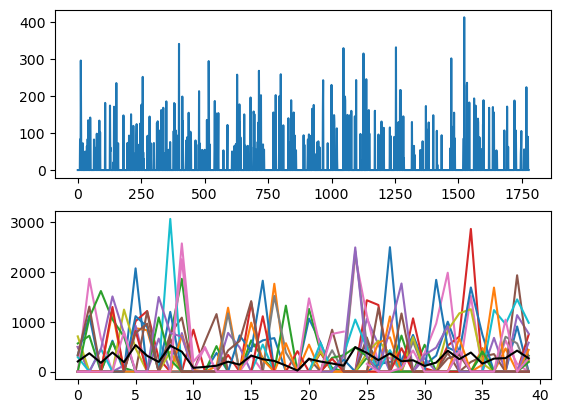

In [22]:
from utils import prepare_behavior_from_file, prepare_activity
from matplotlib import pyplot as plt


pathSession = Path.cwd().parents[2] / f'data/555wt/Session{s:02d}'
for path in pathSession.iterdir():
	if path.stem.startswith('results_CaImAn') and path.stem.endswith('redetected'):
		ld = load_data(path)
		break
nbin = 40
behavior = prepare_behavior_from_file(pathSession / 'aligned_behavior.pkl',nbin=nbin,f=15.)
processed_activity = prepare_activity(ld['S'][neuron,:],behavior['active'],behavior['trials'],nbin=nbin)

neuron = 666
# print(processed_activity.keys())
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(ld['S'][neuron,behavior['active']])
# ax.plot(processed_activity['S'][behavior['active']])
ax = fig.add_subplot(212)
ax.plot(processed_activity['spike_map'].T/behavior['trials']['dwelltime'].T)
fmap = processed_activity['spike_map'].sum(axis=0) / behavior['trials']['dwelltime'].sum(axis=0)

ax.plot(fmap,color='k')

print(np.percentile(fmap[fmap>0],[10,90]))
np.percentile(fmap,[10,50,55,60,90])
np.mean(fmap[fmap<np.percentile(fmap,80)])

In [97]:
processed_activity['trial_map']

a = 2.
sys.float_info.min
a = np.zeros((3,3))
np.finfo(a.dtype).min

-1.7976931348623157e+308

In [4]:
from utils.utils import load_data
from HierarchicalBayesInference_analysis import display_results
results = load_data(pathSession / 'placefield_detection.hdf5')

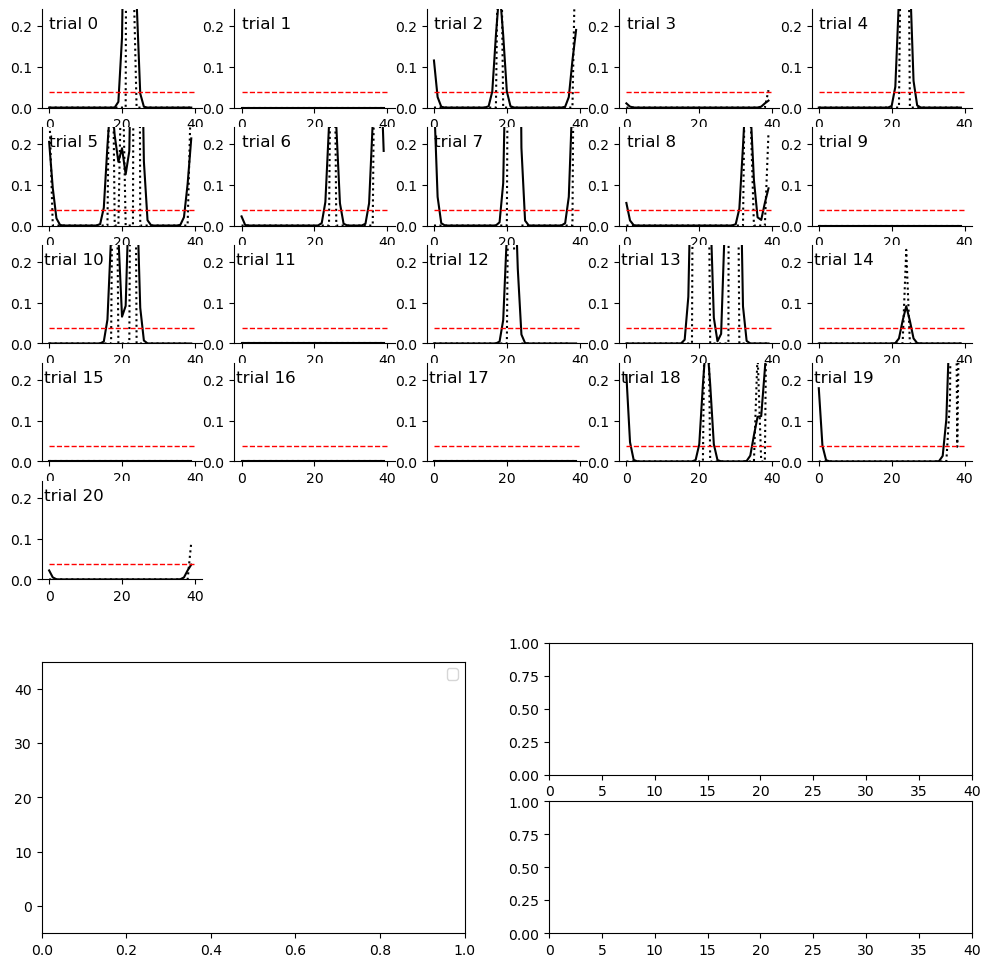

In [13]:
display_results(results,395)

[6 7]
[[3.08585682 0.        ]
 [1.16807427 2.31489643]]
[[   68.78491973     0.        ]
 [ 6599.60313979 13079.13214864]]
6


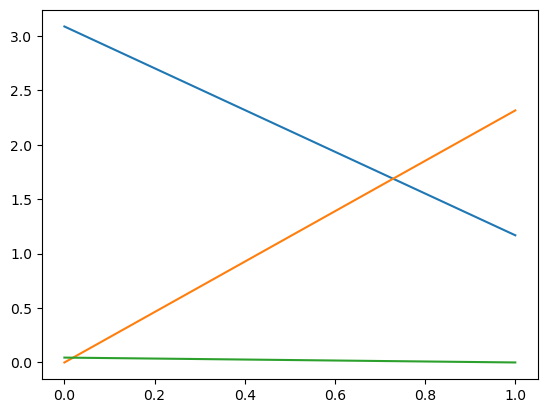

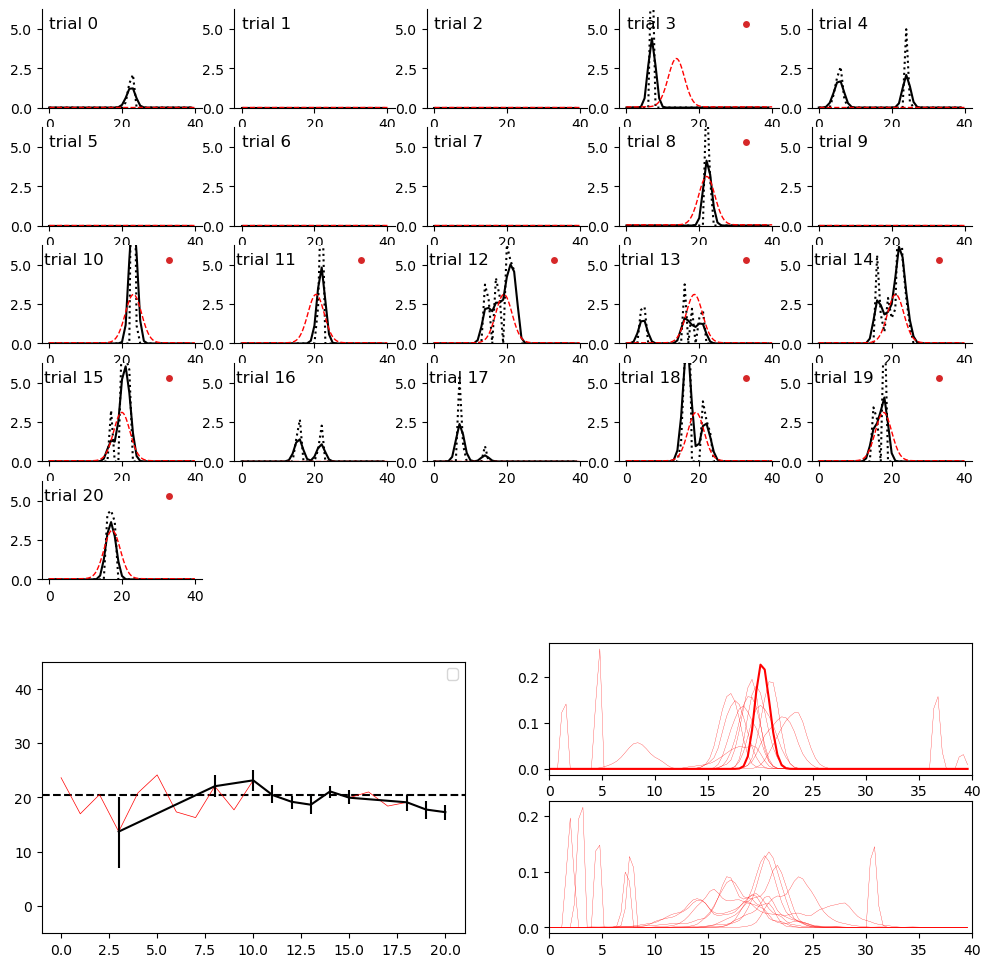

7


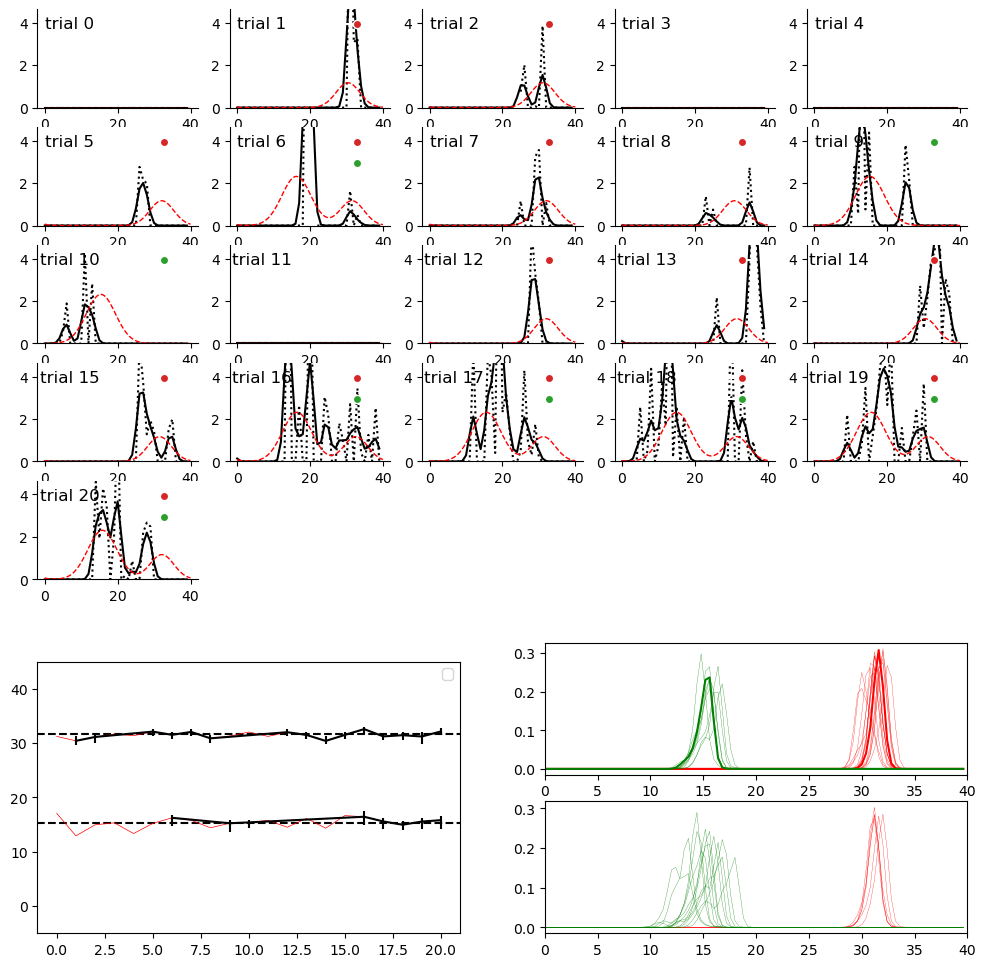

In [ ]:
'''
TODO:
    [ ] slight cleanup of plotting routing (independent of class instance!)
    [ ] check if things can be stored more efficiently (does fmap_trials need to be stored?? can things be stored as sparse format?)
    [x] write into cluster-processable code
    [x] run on complete session and mouse 
    [ ] test with plots
    [ ] write description (results-structure, brief explanation, what does what)
'''
from matplotlib import pyplot as plt
is_PC = results['status']['is_place_cell']
idxes = np.where(
    np.logical_and(
    	np.logical_and(~is_PC['peak_method'],~is_PC['information_method']),
    	is_PC['bayesian_method']
	)
)[0]

print(idxes)

A = results['fields']['parameter']['global']['A'][idxes,...,0]
A0 = results['fields']['parameter']['global']['A0'][idxes,...,0]
print(A)
print(A/A0[:,np.newaxis])

plt.plot(A)
plt.plot(A0)

for idx in idxes[:10]:
    print(idx)
    display_results(results,idx)
# # results_tmp['status']


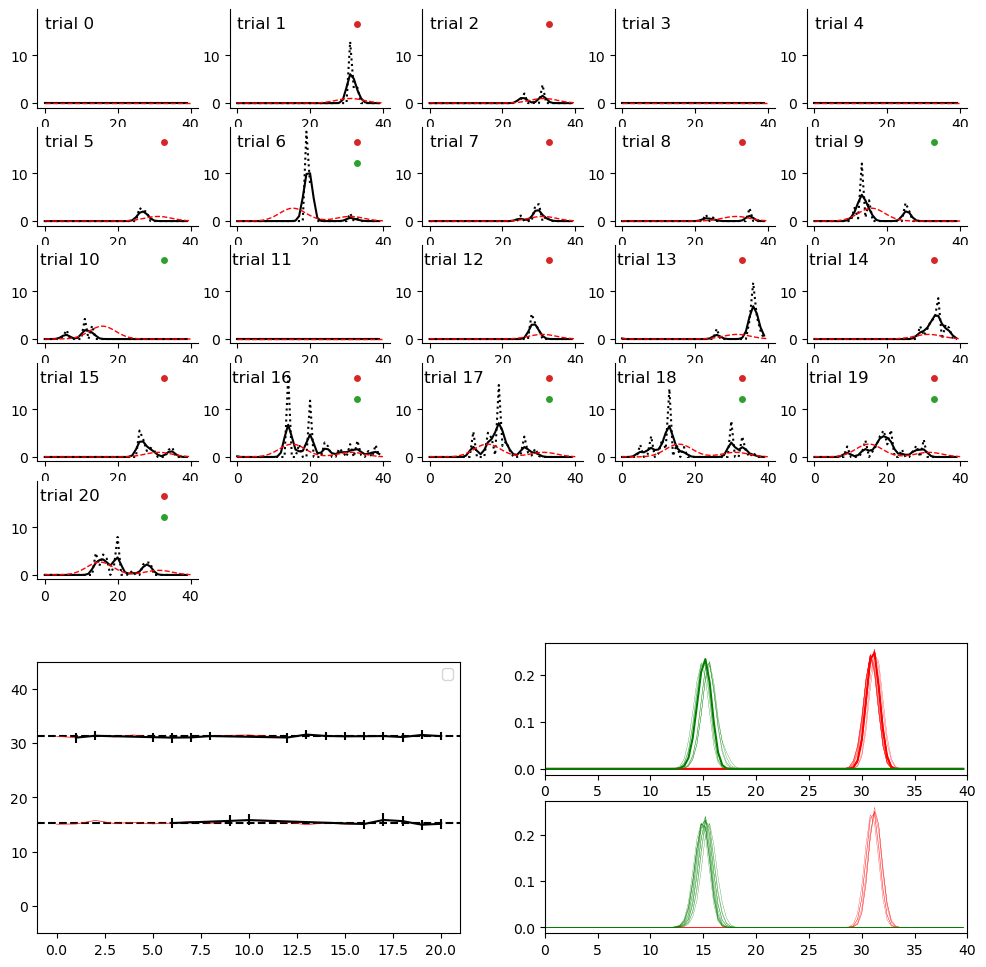

In [136]:
from HierarchicalBayesInference_analysis import display_results
display_results(results_tmp,7)

In [12]:
is_PC = results['status']['is_place_cell']

for key in is_PC.keys():
	print(key,is_PC[key].sum())

peak_n_info = (is_PC['peak_method'] & is_PC['information_method']).sum()
peak_n_bayes = (is_PC['peak_method'] & is_PC['bayesian_method']).sum()
info_n_bayes = (is_PC['information_method'] & is_PC['bayesian_method']).sum()
peak_n_info_n_bayes = (is_PC['peak_method'] & is_PC['information_method'] & is_PC['bayesian_method']).sum()

print(f"{peak_n_info} neurons are detected as place cells by both peak and information method")
print(f"{peak_n_bayes} neurons are detected as place cells by both peak and bayesian method")
print(f"{info_n_bayes} neurons are detected as place cells by both information and bayesian method")
print(f"{peak_n_info_n_bayes} neurons are detected as place cells by all methods")

bayesian_method 260
information_method 109
peak_method 100
stability_method 0
43 neurons are detected as place cells by both peak and information method
54 neurons are detected as place cells by both peak and bayesian method
67 neurons are detected as place cells by both information and bayesian method
35 neurons are detected as place cells by all methods
